# Probability Distribution: 

In [probability theory](https://en.wikipedia.org/wiki/Probability_theory) and [statistics](https://en.wikipedia.org/wiki/statistics), a probability distribution is a [mathematical function](https://en.wikipedia.org/wiki/Function_(mathematics)) that, stated in simple terms, can be thought of as providing the probabilities of occurrence of different possible outcomes in an experiment. 

In more technical terms, the probability distribution is a description of a random phenomenon in terms of the probabilities of events. Examples of random phenomena can include the results of an experiment or survey. A probability distribution is defined in terms of an underlying sample space, which is the set of all possible outcomes of the random phenomenon being observed.


### Discrete and Continuous Distributions

Probability distributions are generally divided into two classes. A __discrete probability distribution__ (applicable to the scenarios where the set of possible outcomes is discrete, such as a coin toss or a roll of dice) can be encoded by a discrete list of the probabilities of the outcomes, known as a [probability mass function](https://en.wikipedia.org/wiki/Probability_mass_function). On the other hand, a __continuous probability distribution__ (applicable to the scenarios where the set of possible outcomes can take on values in a continuous range (e.g. real numbers), such as the temperature on a given day) is typically described by probability density functions (with the probability of any individual outcome actually being 0). Such distributions are generally described with the help of [probability density functions](https://en.wikipedia.org/wiki/Probability_density_function).

### In this notebook, we discuss about most important distributions
* **Bernoulli distribution**
* **Binomial distribution**
* **Poisson distribution**
* **Normal distribution**

#### Some Essential Terminologies

* __Mode__: for a discrete random variable, the value with highest probability (the location at which the probability mass function has its peak); for a continuous random variable, a location at which the probability density function has a local peak.
* __Support__: the smallest closed set whose complement has probability zero.
* __Head__: the range of values where the pmf or pdf is relatively high.
* __Tail__: the complement of the head within the support; the large set of values where the pmf or pdf is relatively low.
* __Expected value or mean__: the weighted average of the possible values, using their probabilities as their weights; or the continuous analog thereof.
* __Median__: the value such that the set of values less than the median, and the set greater than the median, each have probabilities no greater than one-half.
* __Variance__: the second moment of the pmf or pdf about the mean; an important measure of the dispersion of the distribution.
* __Standard deviation__: the square root of the variance, and hence another measure of dispersion.

* __Symmetry__: a property of some distributions in which the portion of the distribution to the left of a specific value is a mirror image of the portion to its right.
* __Skewness__: a measure of the extent to which a pmf or pdf "leans" to one side of its mean. The third standardized moment of the distribution.
* __Kurtosis__: a measure of the "fatness" of the tails of a pmf or pdf. The fourth standardized moment of the distribution.

![kurtosis](https://anotherbloodybullshitblog.files.wordpress.com/2016/01/normal-not-always-the-norm.gif?w=809)

## Bernoulii distribution

The Bernoulli distribution, named after Swiss mathematician [Jacob Bernoulli](https://en.wikipedia.org/wiki/Jacob_Bernoulli), is the probability distribution of a random variable which takes the value 1 with probability $p$ and the value 0 with probability $q = 1 − p$ — i.e., the probability distribution of any single experiment that asks a ___yes–no question___; the question results in a boolean-valued outcome, a single bit of information whose value is success/yes/true/one with probability $p$ and failure/no/false/zero with probability $q$. This distribution has only two possible outcomes and a single trial.

It can be used to represent a coin toss where 1 and 0 would represent "head" and "tail" (or vice versa), respectively. In particular, unfair coins would have $p ≠ 0.5$.

The probability mass function $f$ of this distribution, over possible outcomes $k$, is

$${\displaystyle f(k;p)={\begin{cases}p&{\text{if }}k=1,\\[6pt]1-p&{\text{if }}k=0.\end{cases}}}$$

In [12]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import random
import seaborn as sns

In [2]:
from scipy.stats import bernoulli

#### Generate random variates

In [10]:
# p=0.5 i.e. fair coin
s=bernoulli.rvs(p=0.5,size=10)
s

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1])

(array([7., 0., 0., 0., 0., 0., 0., 0., 0., 3.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

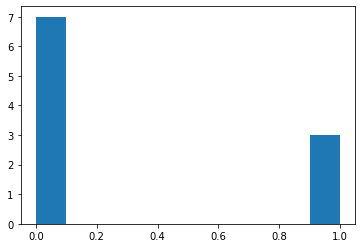

In [11]:
plt.hist(s)

In [5]:
# p=0.2 i.e. more tails than heads
bernoulli.rvs(p=0.2,size=10)

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [6]:
# p=0.8 i.e. more heads than tails
bernoulli.rvs(p=0.8,size=10)

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

#### Mean, variance, skew, and kurtosis

In [7]:
print("A fair coin is spinning...\n"+"-"*30)
pr=0.5 # Fair coin toss probability
mean, var, skew, kurt = bernoulli.stats(p=pr, moments='mvsk')
print("Mean:",mean)
print("Variance:",var)
print("Skew:",skew)
print("Kurtosis:",kurt)
print("\nNow a biased coin is spinning...\n"+"-"*35)
pr=0.7 # Biased coin toss probability
mean, var, skew, kurt = bernoulli.stats(p=pr, moments='mvsk')
print("Mean:",mean)
print("Variance:",var)
print("Skew:",skew)
print("Kurtosis:",kurt)

A fair coin is spinning...
------------------------------
Mean: 0.5
Variance: 0.25
Skew: 0.0
Kurtosis: -2.0

Now a biased coin is spinning...
-----------------------------------
Mean: 0.7
Variance: 0.21000000000000002
Skew: -0.8728715609439702
Kurtosis: -1.2380952380952361


#### Standard deviation, mean, median

In [8]:
print("\nA biased coin with likelihood 0.3 is spinning...\n"+"-"*50)
pr=0.3
print("Std. dev:",bernoulli.std(p=pr))
print("Mean:",bernoulli.mean(p=pr))
print("Median:",bernoulli.median(p=pr))


A biased coin with likelihood 0.3 is spinning...
--------------------------------------------------
Std. dev: 0.458257569496
Mean: 0.3
Median: 0.0
Entropy: 0.6108643020548935


## Binomial distribution

The Binomial Distribution can instead be thought as the sum of outcomes of an event following a Bernoulli distribution. The Binomial Distribution is therefore used in binary outcome events and the probability of success and failure is the same in all the successive trials. This distribution takes two parameters as inputs: the number of times an event takes place and the probability assigned to one of the two classes.

The binomial distribution is frequently used to model the number of successes in a sample of size n drawn with replacement from a population of size N. A simple example of a Binomial Distribution in action can be the toss of a biased/unbiased coin repeated a certain amount of times.

In general, if the random variable $X$ follows the binomial distribution with parameters n ∈ ℕ and p ∈ [0,1], we write X ~ B(n, p). The probability of getting exactly $k$ successes in $n$ trials is given by the probability mass function:

$${\Pr(k;n,p)=\Pr(X=k)={n \choose k}p^{k}(1-p)^{n-k}}$$

for k = 0, 1, 2, ..., n, where

$${\displaystyle {\binom {n}{k}}={\frac {n!}{k!(n-k)!}}}$$

In [10]:
from scipy.stats import binom

#### Generate random variates

8 coins are flipped (or 1 coin is flipped 8 times), each with probability of success (1) of 0.25 This trial/experiment is repeated for 10 times

In [31]:
k=binom.rvs(8,0.25,size=10)
print("Number of success for each trial:",k)
print("Average of the success:", np.mean(k))

Number of success for each trial: [2 3 4 1 1 2 3 0 0 2]
Average of the success: 1.8


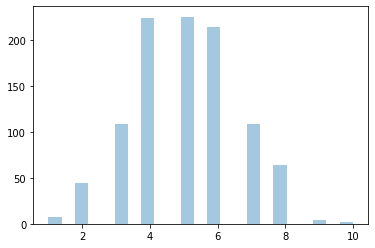

In [44]:
sns.distplot(binom.rvs(n=10, p=0.5, size=1000), hist=True, kde=False)

plt.show()

In [12]:
print("A fair coin is spinning 5 times\n"+"-"*35)
pr=0.5 # Fair coin toss probability
n=5
mean, var, skew, kurt = binom.stats(n=n,p=pr, moments='mvsk')
print("Mean:",mean)
print("Variance:",var)
print("Skew:",skew)
print("Kurtosis:",kurt)
print("\nNow a biased coin is spinning 5 times...\n"+"-"*45)
pr=0.7 # Biased coin toss probability
n=5
mean, var, skew, kurt = binom.stats(n=n,p=pr, moments='mvsk')
print("Mean:",mean)
print("Variance:",var)
print("Skew:",skew)
print("Kurtosis:",kurt)

A fair coin is spinning 5 times
-----------------------------------
Mean: 2.5
Variance: 1.25
Skew: 0.0
Kurtosis: -0.4

Now a biased coin is spinning 5 times...
---------------------------------------------
Mean: 3.5
Variance: 1.0500000000000003
Skew: -0.39036002917941315
Kurtosis: -0.24761904761904757


#### Standard deviation, mean, median

In [14]:
n=5
pr=0.7
print("\n{} biased coins with likelihood {} are spinning...\n".format(n,pr)+"-"*50)
print("Std. dev:",binom.std(n=n,p=pr))
print("Mean:",binom.mean(n=n,p=pr))
print("Median:",binom.median(n=n,p=pr))


5 biased coins with likelihood 0.7 are spinning...
--------------------------------------------------
Std. dev: 1.02469507659596
Mean: 3.5
Median: 4.0


#### Visualize the probability mass function (pmf)

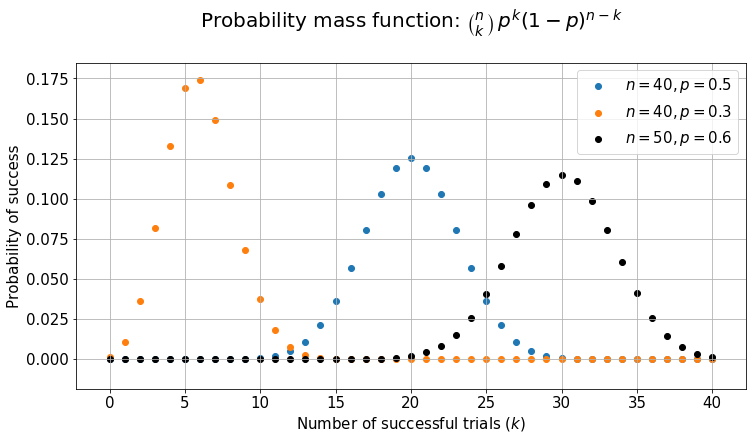

In [15]:
n=40
pr=0.5
rv = binom(n,pr)
x=np.arange(0,41,1)
pmf1 = rv.pmf(x)

n=40
pr=0.15
rv = binom(n,pr)
x=np.arange(0,41,1)
pmf2 = rv.pmf(x)

n=50
pr=0.6
rv = binom(n,pr)
x=np.arange(0,41,1)
pmf3 = rv.pmf(x)

plt.figure(figsize=(12,6))
plt.title("Probability mass function: $\\binom{n}{k}\, p^k (1-p)^{n-k}$\n",fontsize=20)
plt.scatter(x,pmf1)
plt.scatter(x,pmf2)
plt.scatter(x,pmf3,c='k')
plt.legend(["$n=40, p=0.5$","$n=40, p=0.3$","$n=50, p=0.6$"],fontsize=15)
plt.xlabel("Number of successful trials ($k$)",fontsize=15)
plt.ylabel("Probability of success",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.show()

## Poisson Distribution

The Poisson distribution, is a discrete probability distribution that expresses  the probability that an event might happen or not knowing how often it usually occurs.

Poisson Distributions are for example frequently used by insurance companies to conduct risk analysis (eg. predict the number of car crash accidents within a predefined time span) to decide car insurance pricing.

Other examples that may follow a Poisson include

* number of phone calls received by a call center per hour 
* The number of patients arriving in an emergency room between 10 and 11 pm

In [48]:
from scipy.stats import poisson

#### Display probability mass function (pmf)

An event can occur 0, 1, 2, … times in an interval. The average number of events in an interval is designated $\lambda$. This is the event rate, also called the rate parameter. The probability of observing k events in an interval is given by the equation

${\displaystyle P(k{\text{ events in interval}})=e^{-\lambda }{\frac {\lambda ^{k}}{k!}}}$

where,

${\lambda}$ is the average number of events per interval

e is the number 2.71828... (Euler's number) the base of the natural logarithms

k takes values 0, 1, 2, …
k! = k × (k − 1) × (k − 2) × … × 2 × 1 is the factorial of k.

#### Generate random variates

In [55]:
la=5
r = poisson.rvs(mu=la, size=20)
print("Random variates with lambda={}: {}".format(la,r))

la=0.5
r = poisson.rvs(mu=la, size=20)
print("Random variates with lambda={}: {}".format(la,r))

Random variates with lambda=5: [6 8 7 2 6 9 8 7 3 5 5 4 2 4 5 1 6 6 6 5]
Random variates with lambda=0.5: [2 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0]


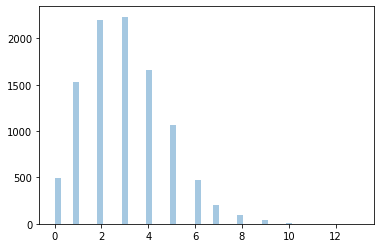

In [52]:
data_poisson = poisson.rvs(mu=3, size=10000)

sns.distplot(data_poisson, kde=False)

plt.show()

In [53]:
print("For small lambda\n"+"-"*25)
la=0.5
mean, var, skew, kurt = poisson.stats(mu=la, moments='mvsk')
print("Mean:",mean)
print("Variance:",var)
print("Skew:",skew)
print("Kurtosis:",kurt)
print("\nNow for large lambda\n"+"-"*30)
la=5
mean, var, skew, kurt = poisson.stats(mu=la, moments='mvsk')
print("Mean:",mean)
print("Variance:",var)
print("Skew:",skew)
print("Kurtosis:",kurt)

For small lambda
-------------------------
Mean: 0.5
Variance: 0.5
Skew: 1.4142135623730951
Kurtosis: 2.0

Now for large lambda
------------------------------
Mean: 5.0
Variance: 5.0
Skew: 0.4472135954999579
Kurtosis: 0.2


#### Standard deviation, mean, median

In [54]:
la=5
print("For lambda = {}\n-------------------------".format(la))
print("Std. dev:",poisson.std(mu=la))
print("Mean:",poisson.mean(mu=la))
print("Median:",poisson.median(mu=la))

For lambda = 5
-------------------------
Std. dev: 2.23606797749979
Mean: 5.0
Median: 5.0


#### For the complete list of functions and methods please [see this link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html#scipy.stats.poisson).

## Normal (Gaussian) distribution

In probability theory, the normal (or Gaussian or Gauss or Laplace–Gauss) distribution is a very common continuous probability distribution. Normal distributions are important in statistics and are often used in the natural and social sciences to represent real-valued random variables whose distributions are not known. A random variable with a Gaussian distribution is said to be normally distributed and is called a normal deviate.

The normal distribution is useful because of the **[central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem)**. In its most general form, under some conditions (which include finite variance), it states that **averages of samples of observations of random variables independently drawn from independent distributions converge in distribution to the normal**, that is, they become normally distributed when the number of observations is sufficiently large. 

Physical quantities that are expected to be the sum of many independent processes (such as measurement errors) often have distributions that are nearly normal. Moreover, many results and methods (such as propagation of uncertainty and least squares parameter fitting) can be derived analytically in explicit form when the relevant variables are normally distributed.

### PDF

The probability density function (PDF) is given by,
$$ f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}} $$
where,
- $\mu$ is the mean or expectation of the distribution (and also its median and mode),
- $\sigma$ is the standard deviation, and $\sigma^2$ is the variance.

In [13]:
from scipy.stats import norm

Text(0, 0.5, 'Probability Density')

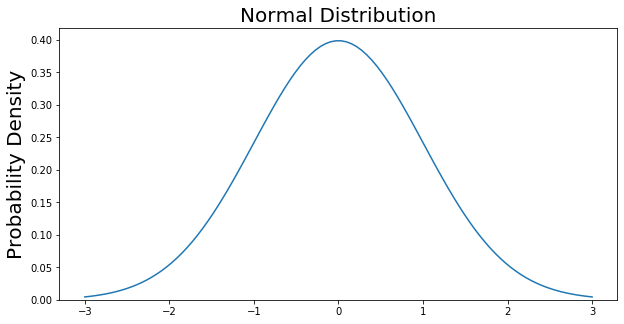

In [57]:
x = np.linspace(-3, 3, num = 100)
constant = 1.0 / np.sqrt(2*np.pi)
pdf_normal_distribution = constant * np.exp((-x**2) / 2.0)

fig, ax = plt.subplots(figsize=(10, 5));
ax.plot(x, pdf_normal_distribution);
ax.set_ylim(0);
ax.set_title('Normal Distribution', size = 20);
ax.set_ylabel('Probability Density', size = 20)

C:\Users\HP PC\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


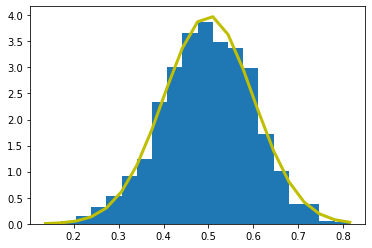

In [17]:
mu,  sigma = 0.5, 0.1

s = np.random.normal(mu, sigma, 1000)

# create the bins and the histogram
count, bins, ignored = plt.hist(s, 20, normed=True)

# plot the distribution curve

plt.plot(bins, 1/(sigma*np.sqrt(2*np.pi))*np.exp( -(bins - mu)**2 / (2*sigma**2)), linewidth = 3, color = "y")
    
plt.show()    

In [59]:
a1 = np.random.normal(loc=0,scale=np.sqrt(0.2),size=100000)
a2 = np.random.normal(loc=0,scale=1.0,size=100000)
a3 = np.random.normal(loc=0,scale=np.sqrt(5),size=100000)
a4 = np.random.normal(loc=-2,scale=np.sqrt(0.5),size=100000)

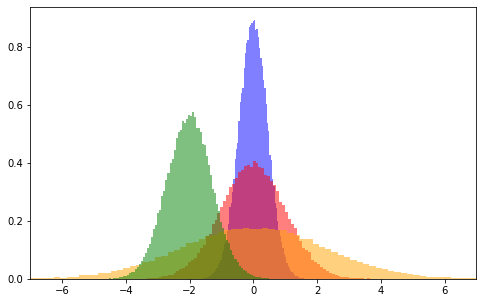

In [60]:
plt.figure(figsize=(8,5))
plt.hist(a1,density=True,bins=100,color='blue',alpha=0.5)
plt.hist(a2,density=True,bins=100,color='red',alpha=0.5)
plt.hist(a3,density=True,bins=100,color='orange',alpha=0.5)
plt.hist(a4,density=True,bins=100,color='green',alpha=0.5)
plt.xlim(-7,7)
plt.show()

## References

https://www.w3schools.com/python/numpy_random_normal.asp

https://towardsdatascience.com/probability-distributions-in-data-science-cce6e64873a7

https://statisticsbyjim.com/basics/probabilitydistributions/#:~:text=A%20probability%20distribution%20is%20a,on%20the%20underlying%20probability%20distribution.

https://bolt.mph.ufl.edu/6050-6052/unit-3b/binomial-random-variables/